# Netflix movies

In this project, we will analyze a dataset of Netflix movies. This dataset includes 7789 titles and 12 columns that describes the title: Show ID, Type, Title, Director, Cast, Country, Date added, Release Year, Rating, Duration, Listed in and Description.
    
We got this dataset in Kaggle, from the user Shivam Bansal. You can access in https://www.kaggle.com/shivamb/netflix-shows.
    
We'll analyze this data to get some insights and understand trendings about the titles in the neflix, using Python (numpy, pandas, matplotlib and seaborn) and Jupyter Notebooks.

## Downloading the Dataset

The first step is to download the dataset. We are using the "Netflix Movies and TV Shows" from Shivam Bansal, in Kaggle.

You can have access in https://www.kaggle.com/shivamb/netflix-shows.

In [ ]:
pip install jovian --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
import pandas as pd
import os

pwd = os.getcwd()
filepath = pwd + '\\netflix_titles.csv'

netflix_df = pd.read_csv(filepath)
netflix_df

## Data Preparation and Cleaning

We will analyze our data to understand how they are organized, filtering and sorting, describe our data and make sure that our data ROCCC's (Reliable, Original, Comprehensive, Current and Cited).
Besides that, we need to make sure that our data can answer the questions needed.

To do that, we will run some functions to better understand our data.

In [ ]:
netflix_df.shape

Our dataset have 7787 rows and 12 columns.

In [ ]:
netflix_df.columns

Our columns are: Show_id, Type, Title, Director, Cast, Country, Date Added, Release Year, Rating, Duration, Listed in and Description.

We expect: 

The columns show_id, type, title, director, cast, country, rating, duration listed_in and description to be "object";

The column date_added to be "datetime";

The column release_year to be "int".
    

To verify the types and NaN values, we will utilize info() function.

In [ ]:
netflix_df.info()

The columns date_added, release_year are not the type we expected, so we have to fix it.

Besides that, director, cast, country, date_added and rating have some null values. Let's explore that too.

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df.date_added)
netflix_df['release_year'] = netflix_df.release_year.astype(int)

In [ ]:
netflix_df[netflix_df['director'].isna()]

We have 2389 null values in Director. We will change these null values to "Unknown".

In [ ]:
netflix_df.at[netflix_df.director.isna(), 'director'] = "Unknown"

We will repeat this step to "cast", "country", and "rating".

In [ ]:
netflix_df.at[netflix_df.cast.isna(), 'cast'] = "Unknown"

In [ ]:
netflix_df.at[netflix_df.country.isna(), 'country'] = "Unknown"

In [ ]:
netflix_df.at[netflix_df.rating.isna(), 'rating'] = "Unknown"

In [ ]:
netflix_df.info()

We can see that the date_added column has 10 NaN values.

We will remove these rows to get a more precise analysis.

In [ ]:
natindexes = netflix_df[netflix_df.date_added.isna()].index.array

netflix_df2 = netflix_df.drop(labels=natindexes, axis=0)

netflix_df2.info()

Now all missing data is handled, and our data is ready to analysis.

We will create 2 subdatasets to improve our analysis: netflix_movies and netflix_series.

In [ ]:
netflix_series = netflix_df2[netflix_df2['type'] == 'TV Show'].reset_index()

netflix_series

We need to need to modify Duration column, so we can make calculations.

In [ ]:
netflix_series[['duration', 'unit of duration']] = netflix_series.duration.str.split(n=2, expand=True)

In [ ]:
netflix_series['duration'] = netflix_series.duration.astype(int)
netflix_series.info()

In [ ]:
netflix_movies = netflix_df2[netflix_df2['type'] == 'Movie'].reset_index()

netflix_movies

We will do the same to Movies dataset.

In [ ]:
netflix_movies[['duration', 'unit of duration']] = netflix_movies.duration.str.split(n=2, expand=True)

In [ ]:
netflix_movies['duration'] = netflix_movies.duration.astype(int)

netflix_movies.info()

## Exploratory Analysis and Visualization

We will run some analysis to get insight from the data.

To improve our analysis, we'll make some visualizations to better understand.

In [ ]:
pip install matplotlib seaborn --upgrade --quiet

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

To better understand how the duration of series are distributed in netflix, we will make a histogram to see how is distributed.

In [ ]:
plt.hist(netflix_series['duration'], bins=15)

Now we going to make the same analysis for movies.

In [ ]:
plt.hist(netflix_movies['duration'], bins = 23)

How production of Tv Shows are growing?

In [ ]:
tvshows_productions = netflix_series[['release_year', 'show_id']][netflix_series['release_year'] < 2021].groupby('release_year').count()

plt.plot(tvshows_productions)

How production of Movies are growing?

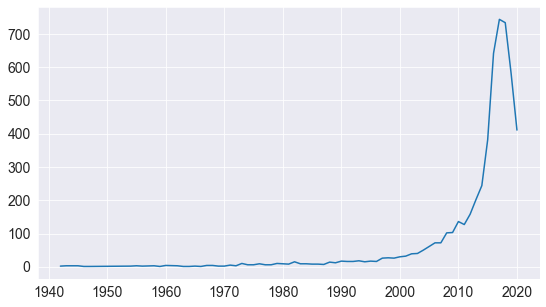

In [178]:
movies_productions = netflix_movies[['release_year', 'show_id']][netflix_movies['release_year'] < 2021].groupby('release_year').count()

plt.plot(movies_productions)

In [ ]:
peakproduction = max(movies_productions['show_id'])

yearofpeak = movies_productions['show_id'][movies_productions['show_id'] == peakproduction].index.array
yearofpeak = yearofpeak[0]

print("Movies productions were growing until {}, with the peak production of {}, when started to decrease.".format(yearofpeak, peakproduction))

How netflix add titles to its platform?

In [ ]:
netflix_df2['year_added'] = pd.DatetimeIndex(netflix_df2.date_added).year
netflix_df2['month_added'] = pd.DatetimeIndex(netflix_df2.date_added).month
netflix_df2


In [ ]:
addanalysis = netflix_df2[['show_id', 'type', 'month_added', 'year_added']]
addanalysismonth = addanalysis[['show_id', 'type', 'month_added']].groupby(['month_added', 'type']).count().reset_index()

sns.barplot(x = 'month_added', y = 'show_id', hue = 'type', data = addanalysismonth)


In [ ]:
addanalysisyear = addanalysis[['show_id', 'type', 'year_added']][addanalysis['year_added'] < 2021].groupby(['year_added', 'type']).count().reset_index()

sns.barplot(x = 'year_added', y = 'show_id', hue = 'type', data = addanalysisyear)

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Asking and Answering Questions

With our analysis done, let's ask some questions to improve our understanding of the netflix dataset.

Question 1 - Which duration is most common in Tv Shows on Netflix collection?

In [ ]:
percent1season = netflix_series.duration[netflix_series['duration'] == 1].count() / netflix_series.duration.count() * 100
pctfinalseries = round(percent1season, 2)
print("{}% of series in Netflix have only 1 season.".format(pctfinalseries))

Question 2 - Which duration is most common in Movies on Netflix collection?

In [ ]:
percentofmovies = netflix_movies.duration[(netflix_movies['duration'] > 83) & (netflix_movies['duration'] < 110)].count() / netflix_movies.duration.count() * 100
pctfinalmovies = round(percentofmovies, ndigits=2)
print("{}% of movies have the duration between 83 and 110 minutes.".format(pctfinalmovies))

Question 3 - TV Shows productions are increasing or decreasing over the last decade?

In [179]:
tvshowsthisdecade = tvshows_productions[tvshows_productions['release_year'] > 2010]
tvshowsthisdecade = tvshowsthisdecade.reset_index(drop=True)
tvshowsthisdecade


for i in range(9):
    percentincrease = round((tvshowsthisdecade.show_id[i + 1] - tvshowsthisdecade.show_id[i]) / tvshowsthisdecade.show_id[i] * 100, 2)
    year = tvshowsthisdecade.release_year[i]
    year2 = tvshowsthisdecade.release_year[i + 1]
    print("From {} to {}, TV Shows productions increased {}%.".format(year, year2, percentincrease))



From 2011 to 2012, TV Shows productions increased 53.85%.
From 2012 to 2013, TV Shows productions increased 6.67%.
From 2013 to 2014, TV Shows productions increased 40.62%.
From 2014 to 2015, TV Shows productions increased 74.44%.
From 2015 to 2016, TV Shows productions increased 52.23%.
From 2016 to 2017, TV Shows productions increased 12.13%.
From 2017 to 2018, TV Shows productions increased 44.03%.
From 2018 to 2019, TV Shows productions increased 7.25%.
From 2019 to 2020, TV Shows productions increased 10.39%.


Question 4 - Movies productions are increasing or decreasing over the last decade?

In [ ]:
movies_productions = movies_productions.reset_index()

In [180]:
moviesthisdecade = movies_productions[movies_productions['release_year'] > 2010]
moviesthisdecade = moviesthisdecade.reset_index(drop=True)
moviesthisdecade

for i in range(9):
    percentincrease = round((moviesthisdecade.show_id[i + 1] - moviesthisdecade.show_id[i]) / moviesthisdecade.show_id[i] * 100, 2)
    year = moviesthisdecade.release_year[i]
    year2 = moviesthisdecade.release_year[i + 1]
    if percentincrease > 0:
        print("From {} to {}, TV Shows productions increased {}%.".format(year, year2, percentincrease))
    else:
        percentincrease = percentincrease * (-1)
        print("From {} to {}, TV Shows productions decreased {}%.".format(year, year2, percentincrease))



KeyError: 'release_year'

Question 5 - Which are the top 3 months that Netflix adds new TV Shows to its collection?

In [181]:
top3months = addanalysismonth[addanalysismonth['type'] == 'TV Show'].sort_values('show_id', ascending=False).head(3).reset_index()


In [182]:
for i in range (3):
    month = top3months.month_added[i]
    shows = top3months.show_id[i]
    a = i+1
    print("The {}º month is top {}, with {} TV Shows added.".format(month, a, shows))

The 12º month is top 1, with 279 TV Shows added.
The 10º month is top 2, with 232 TV Shows added.
The 11º month is top 3, with 227 TV Shows added.


Question 6 - Which are the top 3 months that Netflix adds new Movies to its collection?

In [183]:
top3monthsmovies = addanalysismonth[addanalysismonth['type'] == 'Movie'].sort_values('show_id', ascending=False).head(3).reset_index()

In [184]:
for i in range (3):
    month = top3monthsmovies.month_added[i]
    shows = top3monthsmovies.show_id[i]
    a = i+1
    print("The {}º month is top {}, with {} Movies added.".format(month, a, shows))


The 1º month is top 1, with 560 Movies added.
The 12º month is top 2, with 554 Movies added.
The 10º month is top 3, with 553 Movies added.


Question 7 - Which year Netflix added the most TV Shows to its collection?

In [185]:
topyeartvshows = addanalysisyear[addanalysisyear['type'] == 'TV Show'].sort_values('show_id', ascending=False).head(1).reset_index()
topyeartvshows

,index,year_added,type,show_id
0,21,2020,TV Show,697


In [186]:
year = topyeartvshows.year_added[0]
tvshowsadded = topyeartvshows.show_id[0]

print("The year that Netflix added most TV Shows to its collection was {}, with {} TV Shows added.".format(year, tvshowsadded))

The year that Netflix added most TV Shows to its collection was 2020, with 697 TV Shows added.


Question 8 - Which year Netflix added the most Movies to its collection?

In [187]:
topyearmovie = addanalysisyear[addanalysisyear['type'] == 'Movie'].sort_values('show_id', ascending=False).head(1).reset_index()
topyearmovie

,index,year_added,type,show_id
0,18,2019,Movie,1497


In [188]:
year = topyearmovie.year_added[0]
moviesadded = topyearmovie.show_id[0]

print("The year that Netflix added most TV Shows to its collection was {}, with {} Movies added.".format(year, moviesadded))

The year that Netflix added most TV Shows to its collection was 2019, with 1497 Movies added.


SyntaxError: invalid syntax (<ipython-input-177-b9be91d6a089>, line 1)